In [1]:
import stock
from stock_model import NigModel

In [2]:
spy_weekly = stock.import_spy_weekly()

In [3]:
# initial_model = NigModel(0.8, -0.1, 0.5, 1.9, spy_weekly)

initial_model = NigModel.from_stock_moments(spy_weekly)

model = initial_model.reoptimize(do_print=True)

rho is 60.8360321465797
      fun: 3026.563709173167
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00327418,  0.0086402 ,  0.0037744 , -0.0086402 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 100
      nit: 18
   status: 0
  success: True
        x: array([ 0.76358132, -0.14144332,  0.54184999,  1.93877377])


In [4]:
import math
print(initial_model.mean, initial_model.stddev, initial_model.skewness, initial_model.kurtosis)
print(initial_model.stock.summary)
print(f'variance: {initial_model.stock.summary.variance}')

print(initial_model.stddev / initial_model.stock.summary.stddev)
print(initial_model.skewness / initial_model.stock.summary.skewness)
print(math.sqrt(initial_model.kurtosis / initial_model.stock.summary.kurtosis))

0.025205047045198135 2.0728333654609323 -4.455780298634345 432.08438678814196
Mean: 0.02521. Standard deviation: 0.8732. Skewness: -1.877. Kurtosis: 79.14.
variance: 0.7624496520014723
2.3738802398884897
2.3738802398884893
2.3365785268250505


In [5]:
print(initial_model.alpha, model.alpha)
print(initial_model.beta, model.beta)
print(initial_model.mu, model.mu)
print(initial_model.delta, model.delta)

print(model.alpha**2 / model.beta**2, initial_model.alpha**2 / initial_model.beta**2)

print(initial_model.scipy_stats())
print(model.scipy_stats())

print(model.mean, model.variance, model.skewness, model.kurtosis)

0.042339989760555856 0.39384755896485457
-0.005428380831979912 -0.07295503884298962
0.04814544755067564 0.5418499875643001
0.17745260909512603 1.9387737696641878
29.143769953147494 60.836032146579704
(array(0.02520505), array(4.29663816), array(-4.4557803), array(429.08438679))
(array(0.17639323), array(5.18733343), array(-0.64152208), array(4.54677921))
0.17639322785607392 5.187333427810447 -0.641522078261222 7.54677921491532


<Figure size 432x288 with 0 Axes>

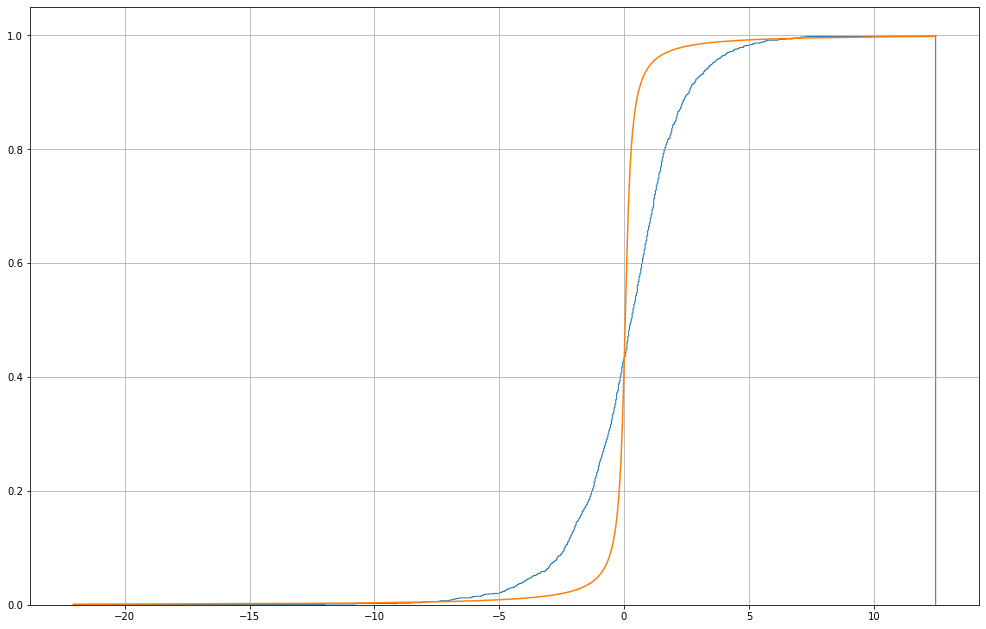

In [6]:
initial_model.plot_comparison()

<Figure size 432x288 with 0 Axes>

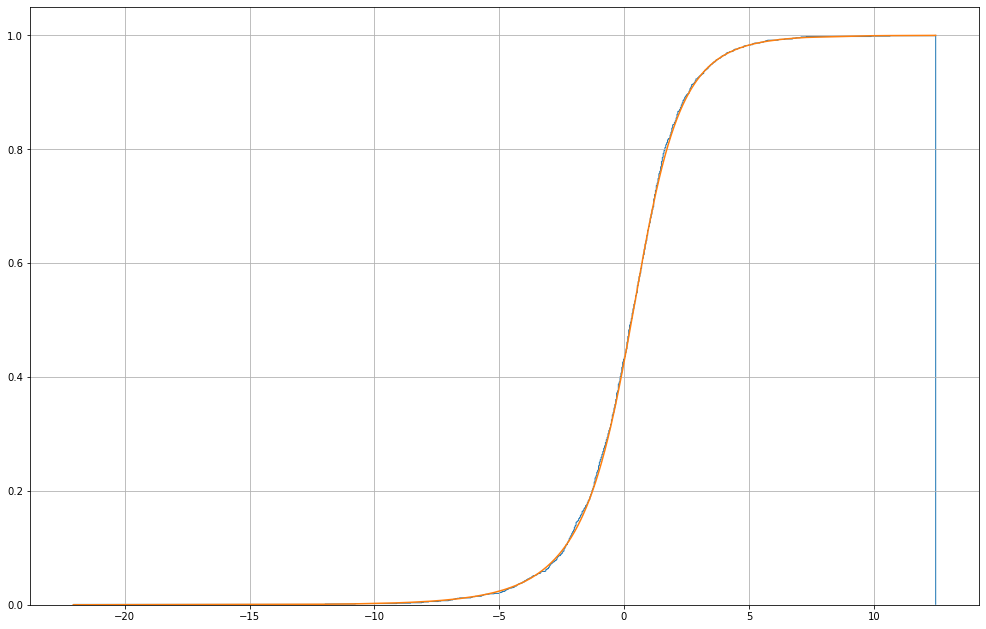

In [7]:
model.plot_comparison()